# Knn implementado manualmente

## Importação das bibliotecas

In [66]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

%load_ext memory_profiler

The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler


## Definição da classe Knn

In [67]:
class Knn:
    # Construtor recebe os dados (características) e rótulos (classificação) de treinamento
    def __init__(self, dados, rotulos):
        self.dadosTreinados = dados
        self.rotulosTreinados = rotulos

    # Retorna a distância euclidiana entre dois vértices x e y
    def distanciaEuclidiana(self, x, y):
        return np.sqrt(np.sum((x - y) ** 2))

    # Classifica todos os vértices recebidos
    def classificar(self, entradas, k):
        result = [self._classificar(x, k) for x in entradas]
        return np.array(result)

    def _classificar(self, dado, k):
        distancias = [self.distanciaEuclidiana(dado, dadoTreinado) for dadoTreinado in self.dadosTreinados]
        # Ordena as distâncias e pega as k menores
        kDistancias = np.argsort(distancias)[:k] 
        # Pega os rótulos dos k melhores
        kRotulos = [self.rotulosTreinados[i] for i in kDistancias]
        # Retorna o mais frequente
        maisFrequente = np.bincount(kRotulos).argmax()
        return maisFrequente

## Definição da classe Classificacao utilizada para mostrar os dados mais facilmente

In [68]:
class Classificacao:
    def __init__(self, knn, iris, dadosTeste, rotulosTeste):
        self.knn = knn
        self.iris = iris
        self.dadosTeste = dadosTeste
        self.rotulosTeste = rotulosTeste

    def mostrarResultados(self, k):
        classificacao = self.knn.classificar(self.dadosTeste, k)
        matriz_confusao = confusion_matrix(self.rotulosTeste, classificacao)

        disp = ConfusionMatrixDisplay(confusion_matrix=matriz_confusao, 
                                      display_labels=self.iris.target_names)
        disp.plot(cmap=plt.cm.Blues)
        plt.title("Matriz de Confusão | k = " + str(k))
        plt.show()

        print(classification_report(self.rotulosTeste, 
                                    classificacao, 
                                    target_names=self.iris.target_names))

## Criando a instância do classificador com o dataset iris

In [69]:
iris = datasets.load_iris()

X = iris.data[:, :2]
y = iris.target

# Dividindo os dados em treinamento e teste
dadosTreinamento, dadosTeste, rotulosTreinamento, rotulosTeste = train_test_split(
    X, y, random_state=50, test_size=0.25, shuffle=True
)

knn = Knn(dados=dadosTreinamento, rotulos=rotulosTreinamento)

classificacao = Classificacao(knn, iris, dadosTeste, rotulosTeste)

## Resultado para k = 1

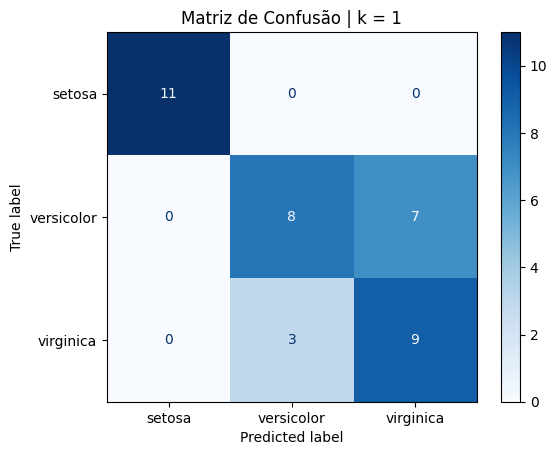

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       0.73      0.53      0.62        15
   virginica       0.56      0.75      0.64        12

    accuracy                           0.74        38
   macro avg       0.76      0.76      0.75        38
weighted avg       0.75      0.74      0.74        38

peak memory: 159.26 MiB, increment: 0.07 MiB
CPU times: user 669 ms, sys: 378 ms, total: 1.05 s
Wall time: 555 ms


In [70]:
%%time
%memit classificacao.mostrarResultados(1)

## Resultado para k = 3

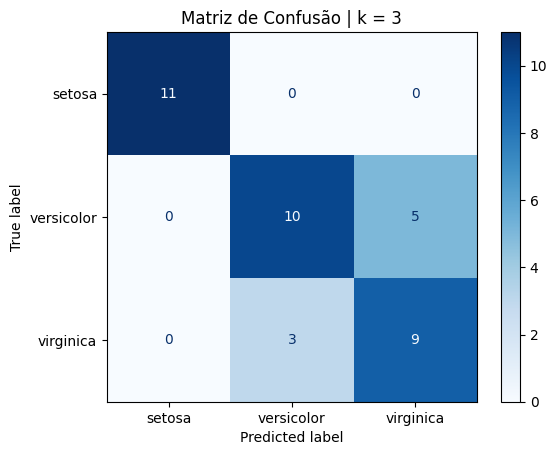

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       0.77      0.67      0.71        15
   virginica       0.64      0.75      0.69        12

    accuracy                           0.79        38
   macro avg       0.80      0.81      0.80        38
weighted avg       0.80      0.79      0.79        38

peak memory: 159.27 MiB, increment: 0.01 MiB
CPU times: user 650 ms, sys: 387 ms, total: 1.04 s
Wall time: 538 ms


In [71]:
%%time
%memit classificacao.mostrarResultados(3)

## Resultado para k = 5

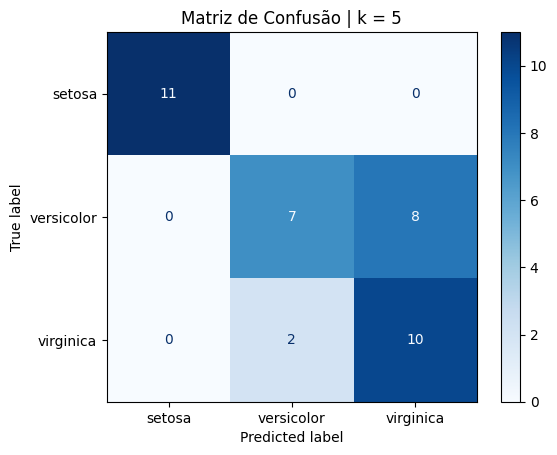

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       0.78      0.47      0.58        15
   virginica       0.56      0.83      0.67        12

    accuracy                           0.74        38
   macro avg       0.78      0.77      0.75        38
weighted avg       0.77      0.74      0.73        38

peak memory: 159.59 MiB, increment: 0.00 MiB
CPU times: user 580 ms, sys: 422 ms, total: 1 s
Wall time: 479 ms


In [72]:
%%time
%memit classificacao.mostrarResultados(5)

## Resultado para k = 7

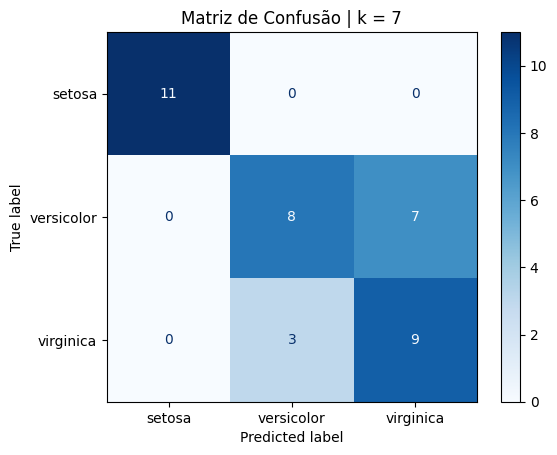

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       0.73      0.53      0.62        15
   virginica       0.56      0.75      0.64        12

    accuracy                           0.74        38
   macro avg       0.76      0.76      0.75        38
weighted avg       0.75      0.74      0.74        38

peak memory: 160.49 MiB, increment: 0.90 MiB
CPU times: user 581 ms, sys: 461 ms, total: 1.04 s
Wall time: 546 ms


In [73]:
%%time
%memit classificacao.mostrarResultados(7)

# Knn da biblioteca Sklearn

## Criação da classe ClassificacaoSklearn para mostrar os dados mais facilmente

In [74]:
class ClassificacaoSklearn:
    def classificar(k):
        knn = KNeighborsClassifier(n_neighbors=k) 

        knn.fit(dadosTreinamento, rotulosTreinamento)

        # Fazer previsões no conjunto de teste
        classificacao = knn.predict(dadosTeste)

        matriz_confusao = confusion_matrix(rotulosTeste, classificacao)

        disp = ConfusionMatrixDisplay(confusion_matrix=matriz_confusao, 
                                        display_labels=iris.target_names)
        disp.plot(cmap=plt.cm.Blues)
        plt.title("Matriz de Confusão | k = " + str(k))
        plt.show()

        print(classification_report(rotulosTeste, 
                                    classificacao, 
                                    target_names=iris.target_names))

## Resultado para k = 1

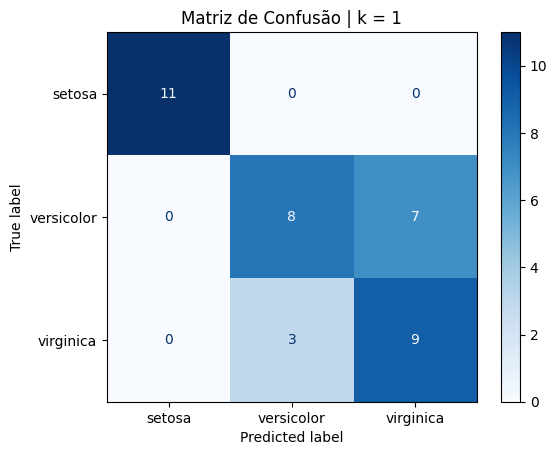

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       0.73      0.53      0.62        15
   virginica       0.56      0.75      0.64        12

    accuracy                           0.74        38
   macro avg       0.76      0.76      0.75        38
weighted avg       0.75      0.74      0.74        38

peak memory: 159.67 MiB, increment: 0.08 MiB
CPU times: user 559 ms, sys: 465 ms, total: 1.02 s
Wall time: 449 ms


In [75]:
%%time
%memit ClassificacaoSklearn.classificar(1)

## Resultado para k = 3

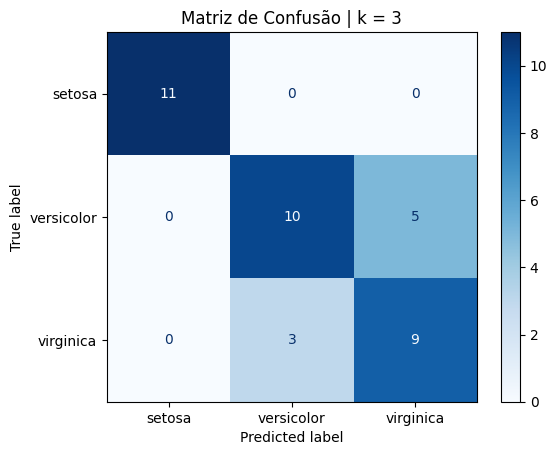

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       0.77      0.67      0.71        15
   virginica       0.64      0.75      0.69        12

    accuracy                           0.79        38
   macro avg       0.80      0.81      0.80        38
weighted avg       0.80      0.79      0.79        38

peak memory: 159.67 MiB, increment: 0.00 MiB
CPU times: user 541 ms, sys: 451 ms, total: 991 ms
Wall time: 425 ms


In [76]:
%%time
%memit ClassificacaoSklearn.classificar(3)

## Resultado para k = 5

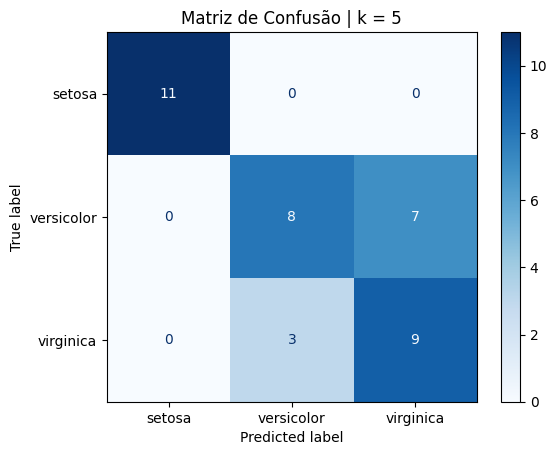

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       0.73      0.53      0.62        15
   virginica       0.56      0.75      0.64        12

    accuracy                           0.74        38
   macro avg       0.76      0.76      0.75        38
weighted avg       0.75      0.74      0.74        38

peak memory: 159.67 MiB, increment: 0.00 MiB
CPU times: user 524 ms, sys: 471 ms, total: 995 ms
Wall time: 462 ms


In [77]:
%%time
%memit ClassificacaoSklearn.classificar(5)

## Resultado para k = 7

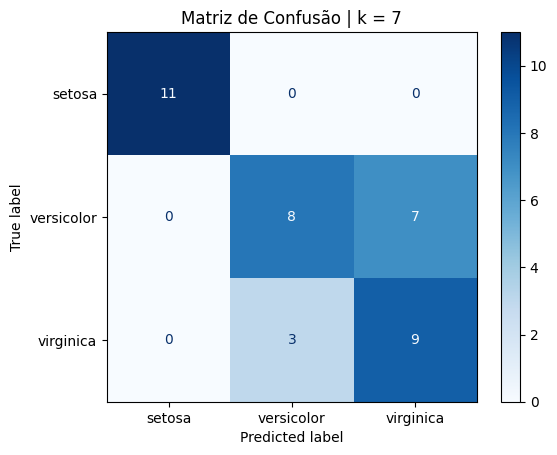

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       0.73      0.53      0.62        15
   virginica       0.56      0.75      0.64        12

    accuracy                           0.74        38
   macro avg       0.76      0.76      0.75        38
weighted avg       0.75      0.74      0.74        38

peak memory: 159.67 MiB, increment: 0.00 MiB
CPU times: user 483 ms, sys: 479 ms, total: 962 ms
Wall time: 391 ms


In [78]:
%%time
%memit ClassificacaoSklearn.classificar(7)